<a href="https://colab.research.google.com/github/saber-030/DNA_Data_Storage/blob/master/BioSOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gzip
import urllib.request
url = 'https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_genomic.fna.gz'
response = urllib.request.urlopen(url)
string = gzip.decompress(response.read()).decode('UTF8')

In [3]:
print(len(string))

3313061631


In [4]:
print(string[44444:44445])

t


In [5]:
!pip install biopython
import os
import sys
import Bio

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [6]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [22]:
downreg_frame = pd.read_csv('/content/Metadata_TNFalphaTreatment_DR.csv')
upreg_frame = pd.read_csv('/content/Metadata_TNFalphaTreatment_UR.csv')
noreg_frame = pd.read_csv('/content/Metadata_TNFalphaTreatment_NR.csv')

downreg_frame=downreg_frame.drop(labels=0)
upreg_frame=upreg_frame.drop(labels=0)
upreg_frame=upreg_frame.drop([947])
noreg_frame=noreg_frame.drop(labels=0)
noreg_frame=noreg_frame.drop(['Neutrally Regulated:','23197','Unnamed: 2','Unnamed: 3'],axis=1)
upreg_frame=upreg_frame.drop(['Up Regulated:','6056','Unnamed: 2','Unnamed: 3'],axis=1)
downreg_frame=downreg_frame.drop(['Down Regulated:','5495','Unnamed: 2','Unnamed: 3'],axis=1)



In [23]:
downreg_frame 

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
1,102106771,102124588,53.9226,19.0706,-1.49954,5E-05,0.04964,DOWN
2,75745480,75748937,43.5768,10.144,-2.10294,5E-05,0.04964,DOWN
3,1064846,1095061,58.4756,18.766,-1.63971,0.0002,0.144783,DOWN
4,78364327,79151992,2.90169,0.542886,-2.41817,0.0003,0.200469,DOWN
5,111366163,111846462,6.50925,1.57436,-2.04772,0.0003,0.200469,DOWN
...,...,...,...,...,...,...,...,...
5491,24216261,24312654,1.82104,0.904859,-1.009,0.77605,0.997649,DOWN
5492,3696239,3848022,4.00562,1.90974,-1.06865,0.77745,0.997649,DOWN
5493,1084433,1605099,1.11977,0.540145,-1.05178,0.7847,0.997649,DOWN
5494,110045604,110167437,1.14986,0.563619,-1.02867,0.79475,0.997649,DOWN


In [ ]:
upreg_frame

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sequence
1,16450831,16491310,6.06052,25.3997,2.0673,5E-05,0.04964,UP,AGGAGAGTAAGCC\nCAGTATGccctaaaatgaaatttaagctTGT...
2,92671856,92681032,3.39059,36.0104,3.40881,5E-05,0.04964,UP,TGAAGAAACTGAACACTGTCAGCTGTGGAGTGAGTAGtacaaatca...
3,102188180,102210135,0.850546,6.04088,2.8283,5E-05,0.04964,UP,aacacctcccaccaggccccacctccagca\nctggggattacaat...
4,128328655,128457453,1.88644,25.6396,3.76463,5E-05,0.04964,UP,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN\nNNNNNNN...
5,104324111,104341708,283.504,1093.94,1.9481,5E-05,0.04964,UP,ATCACTGAGGGTTTTGATTACAAACTCTGCTTCCTAAATTTTCTCC...
...,...,...,...,...,...,...,...,...,...
6052,63334837,63364113,0.968803,2.06157,1.08947,0.78215,0.997649,UP,GCCATTGTGGCATAATGCACTG\nATCCTCCCAAACCCCCAGGACC...
6053,112312406,112824527,0.232561,0.493607,1.08576,0.7844,0.997649,UP,GTTTATCCAGTTTAATCTAATGAGATGAATTATCTAGAATGAGAGA...
6054,6599351,6674487,0.472823,0.976547,1.04639,0.78765,0.997649,UP,ctatCCCGCTGGGGCCGGGATGTTTCCCAG\nACCAGGCTCCAACT...
6055,50135292,50158717,2.00879,4.60103,1.19563,0.7958,0.997649,UP,TATAAAGGAAAGTCCAAGGTGCCATGAGATCACATAAGAGGGACAA...


In [ ]:
noreg_frame

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sequence
1,718060,723373,1.39083,1.32042,-0.0749471,0.9042,0.997649,NEUTRAL,CTCCAATAGAAATCAATTCAAGGTGAATTCcaggaaaatacttaaa...
2,762970,794826,1.26889,0.950662,-0.416564,0.7843,0.997649,NEUTRAL,GGCAAAAGGAACTGGAGATTGACTTAActaccaatgg\nccaatga...
3,762970,794826,0.441037,0.399204,-0.143774,0.9317,0.997649,NEUTRAL,GGCAAAAGGAACTGGAGATTGACTTAActaccaatgg\nccaatga...
4,762970,794826,0.741621,0.672336,-0.141499,0.9061,0.997649,NEUTRAL,GGCAAAAGGAACTGGAGATTGACTTAActaccaatgg\nccaatga...
5,840488,841182,1.01582,0.834182,-0.284206,0.8307,0.997649,NEUTRAL,AACCTGTGTTGCGTTCTGaatgctgtggtctgaaag\ntgtacctt...
...,...,...,...,...,...,...,...,...,...
23193,13319579,13319906,1.55884,1.36938,-0.186953,0.8903,0.997649,NEUTRAL,tctctcttttgcccaggctggagtacagcagtggtgtgagcatggc...
23194,13322480,13323341,1.09034,0.863713,-0.336155,0.7827,0.997649,NEUTRAL,caggatacACTTCTGTGCCATCGTAGGCTGCACTGTCAACATCCCA...
23195,13323620,13324339,0.613802,0.792416,0.368485,0.7971,0.997649,NEUTRAL,aaaccacaaCTATAAACTTCATCAATTTAATCAGTgaagaagggag...
23196,13325038,13326040,0.613794,0.455159,-0.431384,0.7471,0.997649,NEUTRAL,gaaaatttaaaaacaa\nactgatAGGAGGAGTCCCATTCCCTTCT...


In [10]:
def seq_maker(row):
  return string[int(row['Unnamed: 4']):int(row['Unnamed: 5'])+1]


downreg_frame["sequence"]=downreg_frame.apply(lambda row: seq_maker(row), axis=1)
upreg_frame["sequence"]=upreg_frame.apply(lambda row: seq_maker(row), axis=1)
noreg_frame["sequence"]=noreg_frame.apply(lambda row: seq_maker(row), axis=1)

frames = [downreg_frame, upreg_frame, noreg_frame]
df = pd.concat(frames)
df

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sequence
1,102106771,102124588,53.9226,19.0706,-1.49954,5E-05,0.04964,DOWN,CTATCTCCCTTGTTCCATGCCCTGTCCacttgct\nctttttaaaa...
2,75745480,75748937,43.5768,10.144,-2.10294,5E-05,0.04964,DOWN,ttatactaTAATACTCTCTATGCtatgaaattattta\nataatta...
3,1064846,1095061,58.4756,18.766,-1.63971,0.0002,0.144783,DOWN,CACTGCGAGAAGGGTGAGCCTGGCACAGGGCAGGGGGCGGAGGCCG...
4,78364327,79151992,2.90169,0.542886,-2.41817,0.0003,0.200469,DOWN,T\nAAGTAAGTACTTAGCCCTTTAAATTCTTTCCTTGGGAAAGTGT...
5,111366163,111846462,6.50925,1.57436,-2.04772,0.0003,0.200469,DOWN,TCATTCACTACCCAAATGGAACACAAAGTAAAAAGTTTAATGAACT...
...,...,...,...,...,...,...,...,...,...
23193,13319579,13319906,1.55884,1.36938,-0.186953,0.8903,0.997649,NEUTRAL,tctctcttttgcccaggctggagtacagcagtggtgtgagcatggc...
23194,13322480,13323341,1.09034,0.863713,-0.336155,0.7827,0.997649,NEUTRAL,caggatacACTTCTGTGCCATCGTAGGCTGCACTGTCAACATCCCA...
23195,13323620,13324339,0.613802,0.792416,0.368485,0.7971,0.997649,NEUTRAL,aaaccacaaCTATAAACTTCATCAATTTAATCAGTgaagaagggag...
23196,13325038,13326040,0.613794,0.455159,-0.431384,0.7471,0.997649,NEUTRAL,gaaaatttaaaaacaa\nactgatAGGAGGAGTCCCATTCCCTTCT...


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [28]:
def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

print(one_hot_encode("ACCCCTGC"))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [58]:
df.replace(to_replace='inf',value=100)


X = df[['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 10']]
y = df['Unnamed: 11']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train = X_train.fillna(X_train.mean())

In [60]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy:  0.9866187050359713


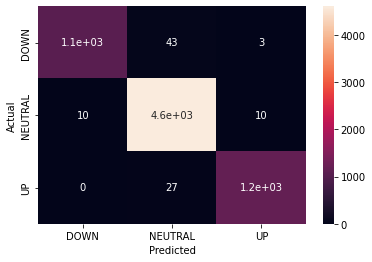

In [61]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()